# Hierarchical Clustering

## Agglomerative HC
1. Make each data point a singe=le-point cluster -> that forms N clusters
2. Take the two closest data points and make them one cluster -> that forms N-1 clusters
3. Take the two closest clusters and make them one cluster -> that forms N-2 clusters
3. Repeat STEP 3 until there is only one cluster

### Distance between two clusters
Option 1: Closes points
Option 2: Furthest points
Option 3: Average distance
Option 4: Distance between centroids

### Dendograms
Threshold -> euclidian distance -> number of clusters

Optimal number of clusters -> Threshould that crosses the largest distance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

Using the dendrogram to find the optimal number of clusters

*OBS: Ward = minimize the variance in each cluster

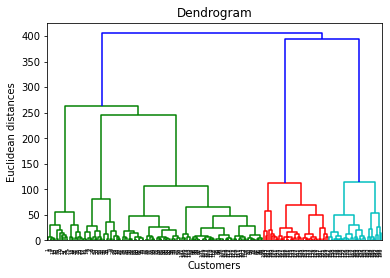

In [2]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The optimal number of clusters is 5

Applying hierarchical clustering on the mall dataset

In [3]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

Visualising the clusters

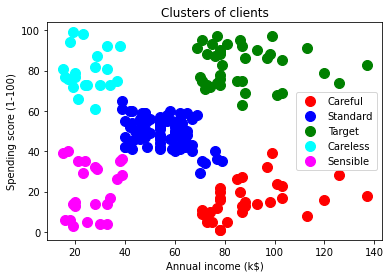

In [5]:
plt.scatter(X[y_hc == 0, 0],X[y_hc == 0,1], s=100, c='red',label='Careful')
plt.scatter(X[y_hc == 1, 0],X[y_hc == 1,1], s=100, c='blue',label='Standard')
plt.scatter(X[y_hc == 2, 0],X[y_hc == 2,1], s=100, c='green',label='Target')
plt.scatter(X[y_hc == 3, 0],X[y_hc == 3,1], s=100, c='cyan',label='Careless')
plt.scatter(X[y_hc == 4, 0],X[y_hc == 4,1], s=100, c='magenta',label='Sensible')
plt.title('Clusters of clients')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()